In [1]:
from tensorflow import keras
import tensorflow as tf
fash_mnist = keras.datasets.fashion_mnist # 导入数据集
(train_images, train_labels), (test_images, test_labels) = fash_mnist.load_data() # 加载数据集 划分为训练集和测试集

In [2]:
train_images.shape # 6W张图像(标签)用于模型训练

(60000, 28, 28)

In [3]:
test_labels.shape # 1W张用于测试

(10000,)

In [4]:
import numpy as np
# import tensorflow as tf
# 查看训练集标签的不同类别
labels = np.unique(train_labels) # 获取训练集标签中的所有唯一类别
# print(labels)
num_classes = len(labels)
print("类别数:", num_classes)
# 定义类别名称
class_names = ['T恤', '裤子', '套衫', '裙子', '外套', '凉鞋', '衬衫', '运动鞋', '包', '短靴']
# 打印每个类别的索引与对应的名称
for label in labels:
    print(f"类别 {label}: {class_names[label]}")

类别数: 10
类别 0: T恤
类别 1: 裤子
类别 2: 套衫
类别 3: 裙子
类别 4: 外套
类别 5: 凉鞋
类别 6: 衬衫
类别 7: 运动鞋
类别 8: 包
类别 9: 短靴


In [5]:
train_images.shape  # 六万张图像 大小为28*28

(60000, 28, 28)

In [6]:
len(train_images) # 60000张

60000

In [7]:
test_images.shape # 测试集为1W张

(10000, 28, 28)

In [8]:
# train_labels[1]

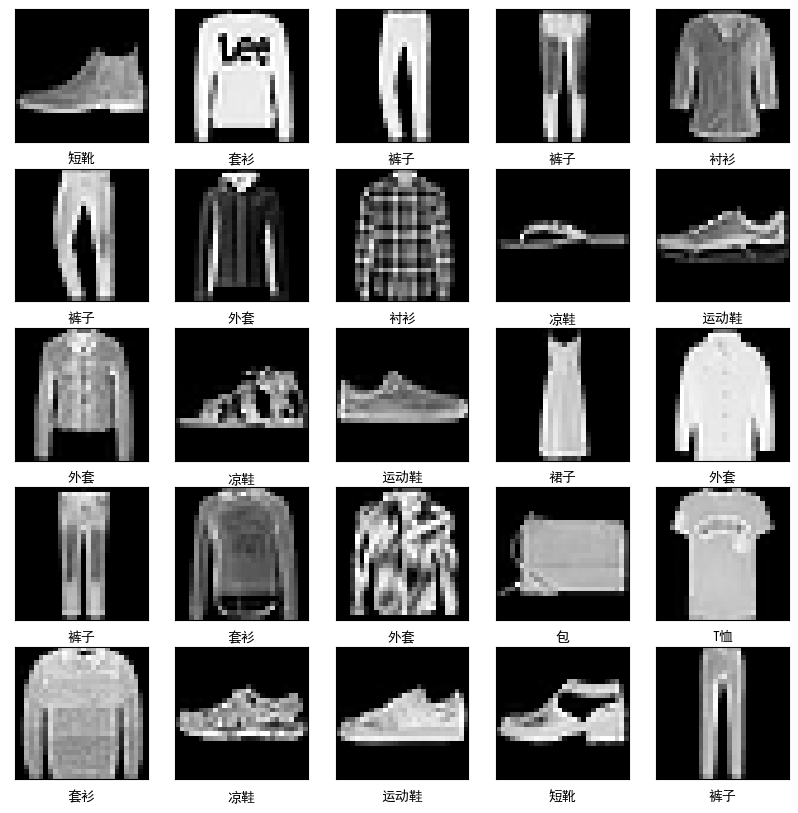

In [22]:
# 绘制训练集中的前 25 个图像及其标签
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.figure(figsize=(10,10))
for i in range(25):
    # print(train_images.shape)
    plt.subplot(5,5,i+1)
    plt.xticks([]) # 移除 x 轴上的刻度标签
    plt.yticks([])
    plt.imshow(test_images[i], cmap='gray') # 取出第i+1张图像   图像呈现为黑白
    plt.xlabel(class_names[test_labels[i]])
plt.show()

In [2]:
train_images = train_images/255 # 将像素值归一化到 [0, 1] 
test_images = test_images/255

In [3]:
model = keras.Sequential([ # 创建一个序列模型
    keras.layers.Flatten(input_shape=(28,28)), # 展平为一维数据
    keras.layers.Dense(128,activation="relu"),  # 选取激活函数为Relu
    keras.layers.Dense(10,activation="softmax") # 接上softmax 做分类 得到具体的概率值
])

In [4]:
model.compile( # 对网络进行配置
    # optimizer="adam", # 优化器
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    loss="sparse_categorical_crossentropy", # 交叉熵损失
    metrics=['accuracy'] # 评价指标为acc
) 


In [13]:
model.fit(train_images,train_labels,epochs=10) # 传入训练集图像 和 标签 以及训练轮数 机器学习sklearn

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6089 - accuracy: 0.7914
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3772 - accuracy: 0.8653
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3327 - accuracy: 0.8793
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3161 - accuracy: 0.8828
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2891 - accuracy: 0.8923
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2761 - accuracy: 0.8984
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2680 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2528 - accuracy: 0.9062
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2415 - accuracy: 0.9099
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.237

In [36]:
# 测试模型
test_loss, test_acc = model.evaluate(test_images,test_labels, verbose=2)
print(f"Accuracy on test set: {test_acc:.2%}")

313/313 - 1s - loss: 0.4184 - accuracy: 0.8487
Accuracy on test set: 84.87%


In [14]:
import numpy as np
# 使用模型进行预测
predictions = model.predict(test_images) # 调用predict进行预测
predictions.shape # 一万张图像 10个不同的值

(10000, 10)

In [15]:
predictions[0] # 取第一张图象  0.99

array([2.3336227e-10, 4.1214189e-13, 2.8850655e-10, 1.0357302e-14,
       2.7890719e-11, 1.7325757e-03, 4.8498383e-10, 2.9983181e-03,
       1.3756338e-10, 9.9526912e-01], dtype=float32)

In [16]:
np.argmax(predictions[0]) # 取到最大值对应的索引 为9

9

In [17]:
import numpy as np
# 对预测结果进行处理
predicted_labels = np.argmax(predictions, axis=1) # 指定在列上操作 取标签
# 打印预测结果
print("Predicted labels:", predicted_labels)

Predicted labels: [9 2 1 ... 8 1 5]


In [18]:
test_labels[2] # 打印真实第一张图像的label

1

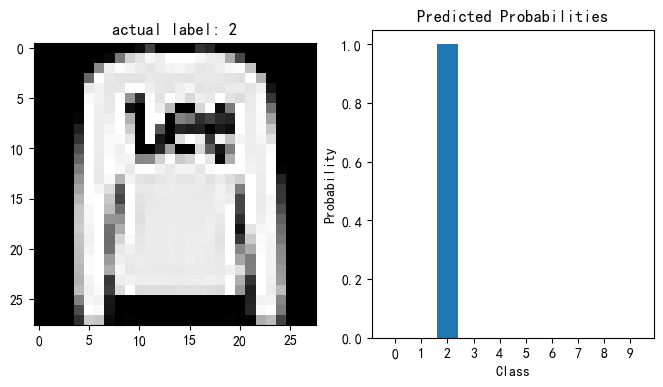

Predicted Label: 2


In [19]:
import matplotlib.pyplot as plt
# 获取第一张图像的预测结果
prediction = predictions[1]
predicted_label = np.argmax(prediction) # 索引对应为9 也是label
# 可视化预测结果
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(test_images[1], cmap='gray') # 取测试集的第一张图象 指定为灰度图
plt.title(f'actual label: {test_labels[1]}')

plt.subplot(1, 2, 2)
plt.bar(range(10), prediction)
plt.xticks(range(10))
plt.xlabel('Class')
plt.ylabel('Probability')
plt.title('Predicted Probabilities')
plt.show()

print(f"Predicted Label: {predicted_label}")
